<a href="https://colab.research.google.com/github/edogriba/NAML-2024/blob/main/NAMLExtra01BitcoinPriceRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXTRA problems

## Bitcoin Price Analysis with Regression

In [87]:
!unzip bitcoin_prices.zip


Archive:  bitcoin_prices.zip
replace bitcoin_price_1week_Test - Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [88]:
!pip install mplfinance

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

df = pd.read_csv("bitcoin_price_Training - Training.csv")

df2 = pd.read_csv("bitcoin_price_1week_Test - Test.csv")

In [122]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [124]:
rev_df = df[::-1].reset_index(drop=True)

In [125]:
rev_df['Date'] = pd.to_datetime(rev_df['Date'])
#rev_df = rev_df[rev_df['Date'] < pd.to_datetime('2015-01-01')]
rev_df.set_index('Date', inplace=True)
rev_df['Volume'] = pd.to_numeric(rev_df['Volume'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


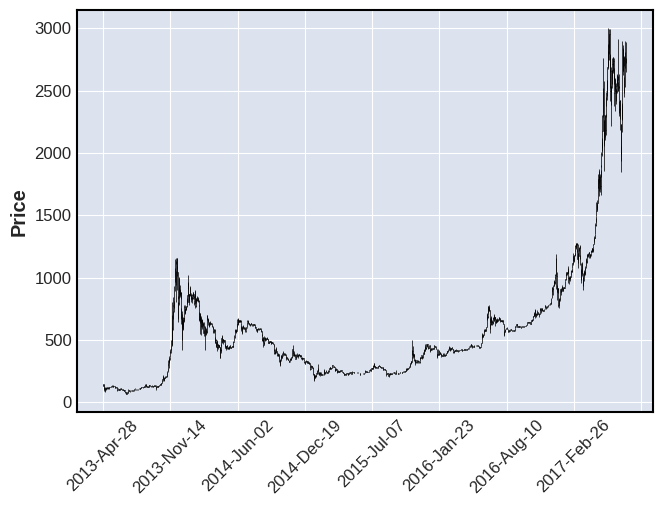

In [126]:
mpf.plot(rev_df)

In [143]:
len(rev_df)


Date
2017-04-23    1207.21
2017-04-24    1250.15
2017-04-25    1265.49
2017-04-26    1281.08
2017-04-27    1317.73
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 100, dtype: float64


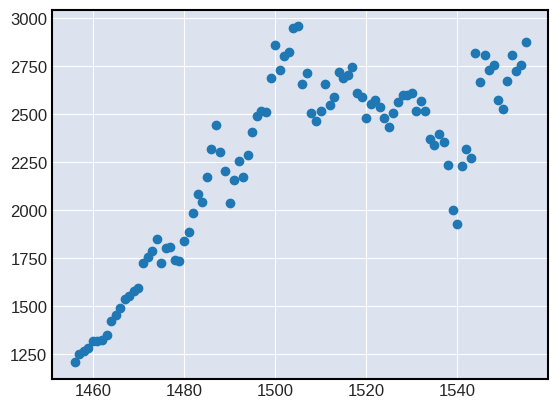

In [156]:
n_days = 100
prices = rev_df['Close'][len(rev_df)-n_days:len(rev_df)]
days = np.arange(len(rev_df)-n_days, len(rev_df))
print(prices)
plt.scatter(days, prices)

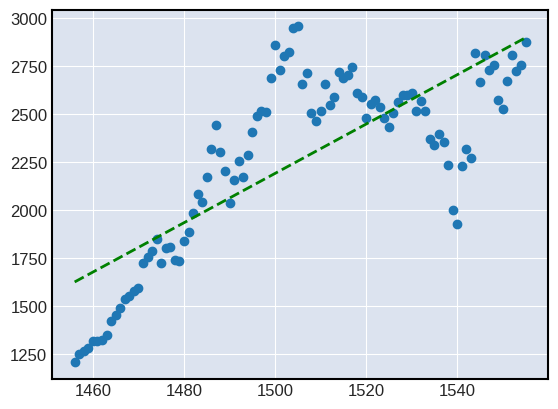

In [161]:
# Let's try to use linear regression

Phi = np.hstack([days[:, None], np.ones((n_days, 1))])

w_ls = np.linalg.pinv(Phi) @ prices

plt.scatter(days, prices)

plt.plot(days, w_ls[0]*days + w_ls[1], 'g--')

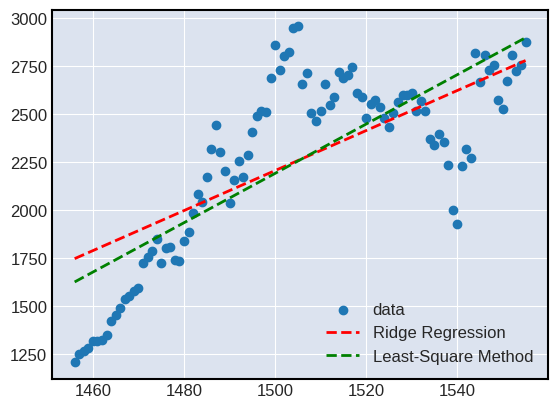

In [164]:
# Let's try to use Ridge Regression
lam = 0.01

alpha = np.linalg.solve(Phi @ Phi.T + lam * np.eye(n_days), prices)

w_rr = Phi.T @ alpha

Phi_test = np.hstack([days[:, None], np.ones((n_days, 1))])

y_rr = Phi_test @ w_rr

plt.scatter(days, prices, label='data')
plt.plot(days, y_rr, "r--", label='Ridge Regression')
plt.plot(days, w_ls[0]*days + w_ls[1], 'g--', label='Least-Square Method')
plt.legend()




In [184]:
print(df2)

           Date     Open     High      Low    Close         Volume  \
0  Aug 07, 2017  3212.78  3397.68  3180.89  3378.94  1,482,280,000   
1  Aug 06, 2017  3257.61  3293.29  3155.60  3213.94  1,105,030,000   
2  Aug 05, 2017  2897.63  3290.01  2874.83  3252.91  1,945,700,000   
3  Aug 04, 2017  2806.93  2899.33  2743.72  2895.89  1,002,120,000   
4  Aug 03, 2017  2709.56  2813.31  2685.14  2804.73    804,797,000   
5  Aug 02, 2017  2727.13  2762.53  2668.59  2710.67  1,094,950,000   
6  Aug 01, 2017  2871.30  2921.35  2685.61  2718.26  1,324,670,000   

       Market Cap  
0  52,987,300,000  
1  53,720,900,000  
2  47,778,200,000  
3  46,276,200,000  
4  44,666,400,000  
5  44,950,800,000  
6  47,321,800,000  


In [190]:
test_prices = df2['Close']
n_test_days = 7
test_days = np.arange(0, n_test_days)

In [193]:
n_test_days = 100
test_days = np.linspace(min(days), max(days), n_test_days)

Date
2017-04-23    1207.21
2017-04-24    1250.15
2017-04-25    1265.49
2017-04-26    1281.08
2017-04-27    1317.73
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 100, dtype: float64


<ipython-input-196-facf4c76038d>:6: RuntimeWarning: overflow encountered in scalar power
  return (xi + xj)**q + 1
<ipython-input-196-facf4c76038d>:21: RuntimeWarning: invalid value encountered in matmul
  y_kr = k_test @ alpha


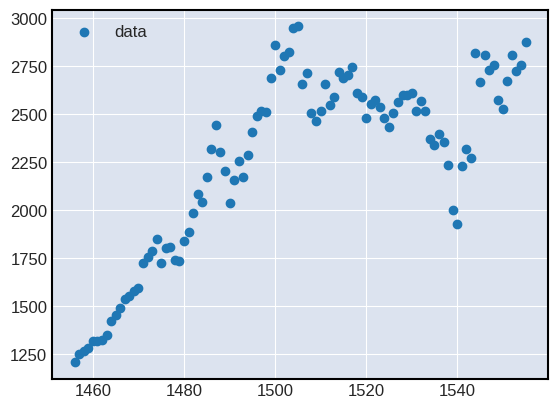

In [196]:
# Kernel Regression
print(prices)
lam = 1.0

def higher_order_scalar_product(xi, xj, q):
  return (xi + xj)**q + 1


plt.scatter(days, prices, label='data')
plt.legend()


for q in [1, 3]:

  k = np.array([[higher_order_scalar_product(q, days[i], days[j]) for j in range(n_days)] for i in range(n_days)])

  alpha = np.linalg.solve( k + lam * np.eye(n_days), prices)

  k_test = np.array([[higher_order_scalar_product(q, test_days[i], days[j]) for j in range(n_days)] for i in range(n_test_days)])

  y_kr = k_test @ alpha

  plt.plot(test_days, y_kr,  label=f'Kernel Regression {q}')

#plt.ylim(1200, 3000)